# DATA Analysis

The purpose of this Notebook is to perform the data Analysis, that is comparing the outputs generated from the previous notebooks for all the different samples. 



### Packages installation (since Aug 2021)

In [2]:
#pip install -U wxPython

### Libraries

In [1]:
import numpy 
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from glob import glob
from functools import reduce
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import re
from itertools import cycle
import wx



#%matplotlib notebook

ModuleNotFoundError: No module named 'wx'

# 1. Data import and merging 

## 1.1 XP-Ramp

In [2]:
spl = 'ASW'

In [4]:
XP_Ramp_df = pd.read_csv('..\DATA\DATA-Processing\PAC\XP_list_test.csv')
XP_Ramp_df_I = XP_Ramp_df.set_index('Date')

In [5]:
XP_Ramp_df_I.head(5)

,Sample,20K,25K,30K,40K,50K,55K,60K,65K,70K,...,137K,138K,140K,142K,145K,150K,155K,160K,180K,200K
Date,,,,,,,,,,,,,,,,,,,,,
2020_09_15,ASW,[1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,[3],NaN,NaN,[4],NaN,NaN,NaN,NaN
2020_09_16,ASW,"[1, 2]",NaN,NaN,"[3, 4, 5]",NaN,NaN,"[6, 7, 8]",NaN,NaN,...,NaN,NaN,"[21, 22, 23]",NaN,NaN,"[24, 25, 26]",NaN,NaN,"[27, 28, 29]","[30, 31]"
2020_09_17,ASW,"[1, 2]",NaN,NaN,"[3, 4, 5]",NaN,NaN,"[6, 7, 8]",NaN,NaN,...,NaN,NaN,"[21, 22, 23]",NaN,NaN,"[24, 25, 26]",NaN,NaN,"[27, 28]",NaN
2020_09_21,ASW,"[1, 2]",NaN,NaN,"[3, 4, 5]",NaN,NaN,"[6, 7, 8]",NaN,NaN,...,NaN,NaN,"[21, 22, 23]",NaN,NaN,"[24, 25, 26]",NaN,NaN,"[27, 28]",NaN
2020_09_28,ASW,"[1, 2]",NaN,"[3, 4, 5, 6]","[7, 8, 9, 10]","[11, 12, 13, 14]",NaN,"[15, 16, 17, 18]",NaN,"[19, 20, 21, 22]",...,NaN,NaN,"[59, 60, 61, 62]",NaN,"[63, 64, 65, 66]","[67, 68, 69, 70, 71, 72, 73, 74]","[75, 76, 77, 78]","[79, 80]",NaN,NaN


## 1.2 DR1 - DR2 - DR3 all dates

 DR1 - DR2 - DR3 are merged together

### 1.2.1 Import

In [6]:
#DR1

DR1_Allscans = glob('..\DATA\DATA-Processing\PAC\XP_1-1/Samples/*/Data/DR/DR1_*_All-scans.csv')

# DR2

DR2_Allscans = glob('..\DATA\DATA-Processing\PAC\XP_1-1/Samples/*/Data/DR/DR2_*_All-scans.csv')

# DR3

DR3_Allscans = glob("..\DATA\DATA-Processing\PAC\XP_1-1/Samples/*\Data\DR\DR3_*_A.csv")

#### Sanity Check

In [8]:
DR1_Allscans

['..\\DATA\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_15\\Data\\DR\\DR1_2020_09_15_All-scans.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_16\\Data\\DR\\DR1_2020_09_16_All-scans.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_17\\Data\\DR\\DR1_2020_09_17_All-scans.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_21\\Data\\DR\\DR1_2020_09_21_All-scans.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_09_28\\Data\\DR\\DR1_2020_09_28_All-scans.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_10_14\\Data\\DR\\DR1_2020_10_14_All-scans.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_10_22\\Data\\DR\\DR1_2020_10_22_All-scans.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_11_16\\Data\\DR\\DR1_2020_11_16_All-scans.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_11_19\\Data\\DR\\DR1_2020_11_19_All-scans.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1/Samples\\2020_11_23\\Data\\DR\\D

In [9]:
#DR2_Allscans

In [10]:
#DR3_Allscans

### 1.2.2 Merging

#### DR1

In [11]:
All_data_frame = []

for items in DR1_Allscans:

    df = pd.read_csv(items)
    df_1 = df.T.iloc[1:].T
    
    All_data_frame.append(df_1) 
    
    del df
    del df_1
    
    DR1_Allscans_full = reduce(lambda left,right: pd.merge(left,right, on=['Wavenumber'],how='outer'), All_data_frame)
    
    

In [12]:
DR1_Allscans_full

,Wavenumber,ASW_2020_09_15_1,ASW_2020_09_15_2,ASW_2020_09_15_3,ASW_2020_09_15_4,ASW_2020_09_16_1,ASW_2020_09_16_2,ASW_2020_09_16_3,ASW_2020_09_16_4,ASW_2020_09_16_5,...,ASW_2021_07_13_17,ASW_2021_07_13_18,ASW_2021_07_13_19,ASW_2021_07_13_20,ASW_2021_07_13_21,ASW_2021_07_13_22,ASW_2021_07_13_23,ASW_2021_07_13_24,ASW_2021_07_13_25,ASW_2021_07_13_26
0,799.8442,0.070200,0.086859,0.080537,0.055492,0.068765,0.070958,0.079536,0.080457,0.083105,...,0.112301,0.112165,0.111290,0.114546,0.111352,0.112160,0.114865,0.117401,0.118798,0.112614
1,800.3264,0.069613,0.085440,0.084133,0.045511,0.066157,0.068055,0.073433,0.073509,0.076351,...,0.101721,0.100925,0.100979,0.103694,0.101778,0.100835,0.104572,0.107281,0.107575,0.111304
2,800.8085,0.069002,0.081987,0.086396,0.034734,0.063596,0.065323,0.067591,0.067142,0.069968,...,0.090586,0.090152,0.090122,0.092359,0.091307,0.089453,0.093991,0.096408,0.096146,0.109683
3,801.2906,0.069099,0.078084,0.083552,0.036551,0.063784,0.066162,0.069236,0.069118,0.071792,...,0.089263,0.090480,0.089502,0.090657,0.089994,0.088894,0.093375,0.095749,0.095276,0.107832
4,801.7727,0.068733,0.076453,0.081117,0.039316,0.064503,0.067363,0.070878,0.071425,0.073453,...,0.094123,0.094984,0.094239,0.095002,0.094698,0.094322,0.098065,0.100489,0.100310,0.107623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6634,3998.2570,-0.017155,-0.016794,-0.016967,-0.006420,-0.017952,-0.016452,-0.014667,-0.014350,-0.013844,...,-0.019303,-0.018898,-0.018461,-0.015902,-0.016764,-0.017420,-0.018147,-0.019271,-0.019650,-0.019098
6635,3998.7390,-0.017126,-0.017087,-0.017292,-0.006350,-0.018364,-0.016865,-0.014762,-0.014372,-0.013879,...,-0.019276,-0.018882,-0.018438,-0.015903,-0.016772,-0.017392,-0.018119,-0.019247,-0.019640,-0.019025
6636,3999.2210,-0.017211,-0.017489,-0.017849,-0.006541,-0.018844,-0.017376,-0.015208,-0.014730,-0.014253,...,-0.019218,-0.018809,-0.018348,-0.015880,-0.016743,-0.017337,-0.018042,-0.019167,-0.019563,-0.018901
6637,3999.7030,-0.017211,-0.016742,-0.017107,-0.006789,-0.018146,-0.016685,-0.014652,-0.014254,-0.013813,...,-0.019852,-0.019407,-0.018991,-0.016492,-0.017368,-0.018002,-0.018668,-0.019787,-0.020182,-0.019602


In [13]:
#DR1_Allscans_full.to_csv('..\DATA\DATA-Processing\PAC\DR1_full.csv')

#### DR2

In [16]:
All_data_frame = []

for items in DR2_Allscans:

    df = pd.read_csv(items)
    df_1 = df.T.iloc[1:].T
    
    All_data_frame.append(df_1) 
    
    del df
    del df_1
    
    DR2_Allscans_full = reduce(lambda left,right: pd.merge(left,right, on=['Wavenumber'],how='outer'), All_data_frame)
    
    

In [17]:
#DR2_Allscans_full.to_csv('D:\DATA-Processing\PAC\DR2_full.csv')

In [18]:
DR2_Allscans_full


#DR2_Allscans = glob("D:\PhD-WS\Projects\PAC\XP_1-1\DATA\*\Data\DR\DR2*All-scans.csv")

,Wavenumber,ASW_2020_09_15_1,ASW_2020_09_15_2,ASW_2020_09_15_3,ASW_2020_09_15_4,ASW_2020_09_16_1,ASW_2020_09_16_2,ASW_2020_09_16_3,ASW_2020_09_16_4,ASW_2020_09_16_5,...,ASW_2021_07_13_17,ASW_2021_07_13_18,ASW_2021_07_13_19,ASW_2021_07_13_20,ASW_2021_07_13_21,ASW_2021_07_13_22,ASW_2021_07_13_23,ASW_2021_07_13_24,ASW_2021_07_13_25,ASW_2021_07_13_26
0,799.8442,0.060549,0.076188,0.071446,0.047759,0.061813,0.062677,0.070377,0.071031,0.073033,...,0.093934,0.093203,0.092399,0.099772,0.096810,0.097544,0.100107,0.103579,0.104936,0.101043
1,800.3264,0.059965,0.074772,0.075044,0.037780,0.059208,0.059777,0.064277,0.064086,0.066281,...,0.083360,0.081969,0.082094,0.088924,0.087240,0.086223,0.089819,0.093463,0.093718,0.099738
2,800.8085,0.059358,0.071323,0.077309,0.027005,0.056651,0.057048,0.058439,0.057722,0.059902,...,0.072232,0.071203,0.071244,0.077594,0.076774,0.074845,0.079243,0.082596,0.082294,0.098120
3,801.2906,0.059458,0.067423,0.074469,0.028824,0.056841,0.057890,0.060087,0.059701,0.061729,...,0.070915,0.071538,0.070631,0.075896,0.075466,0.074291,0.078632,0.081942,0.081429,0.096272
4,801.7727,0.059095,0.065795,0.072036,0.031592,0.057564,0.059094,0.061732,0.062012,0.063394,...,0.075783,0.076050,0.075375,0.080245,0.080174,0.079724,0.083327,0.086687,0.086468,0.096067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6634,3998.2570,0.000151,0.000688,0.000876,0.000556,0.000884,0.000916,0.000533,0.000411,0.000489,...,0.001156,0.001089,0.001162,0.001180,0.001225,0.001234,0.001153,0.001119,0.001150,0.001113
6635,3998.7390,0.000183,0.000399,0.000554,0.000626,0.000476,0.000507,0.000442,0.000392,0.000458,...,0.001186,0.001108,0.001187,0.001181,0.001220,0.001265,0.001183,0.001146,0.001162,0.001189
6636,3999.2210,0.000101,0.000000,0.000000,0.000436,0.000000,0.000000,0.000000,0.000039,0.000088,...,0.001247,0.001184,0.001280,0.001206,0.001251,0.001322,0.001264,0.001229,0.001242,0.001314
6637,3999.7030,0.000105,0.000750,0.000746,0.000190,0.000703,0.000696,0.000560,0.000518,0.000532,...,0.000616,0.000588,0.000641,0.000596,0.000628,0.000660,0.000640,0.000611,0.000625,0.000614


In [19]:
DR2_Allscans_full

,Wavenumber,ASW_2020_09_15_1,ASW_2020_09_15_2,ASW_2020_09_15_3,ASW_2020_09_15_4,ASW_2020_09_16_1,ASW_2020_09_16_2,ASW_2020_09_16_3,ASW_2020_09_16_4,ASW_2020_09_16_5,...,ASW_2021_07_13_17,ASW_2021_07_13_18,ASW_2021_07_13_19,ASW_2021_07_13_20,ASW_2021_07_13_21,ASW_2021_07_13_22,ASW_2021_07_13_23,ASW_2021_07_13_24,ASW_2021_07_13_25,ASW_2021_07_13_26
0,799.8442,0.060549,0.076188,0.071446,0.047759,0.061813,0.062677,0.070377,0.071031,0.073033,...,0.093934,0.093203,0.092399,0.099772,0.096810,0.097544,0.100107,0.103579,0.104936,0.101043
1,800.3264,0.059965,0.074772,0.075044,0.037780,0.059208,0.059777,0.064277,0.064086,0.066281,...,0.083360,0.081969,0.082094,0.088924,0.087240,0.086223,0.089819,0.093463,0.093718,0.099738
2,800.8085,0.059358,0.071323,0.077309,0.027005,0.056651,0.057048,0.058439,0.057722,0.059902,...,0.072232,0.071203,0.071244,0.077594,0.076774,0.074845,0.079243,0.082596,0.082294,0.098120
3,801.2906,0.059458,0.067423,0.074469,0.028824,0.056841,0.057890,0.060087,0.059701,0.061729,...,0.070915,0.071538,0.070631,0.075896,0.075466,0.074291,0.078632,0.081942,0.081429,0.096272
4,801.7727,0.059095,0.065795,0.072036,0.031592,0.057564,0.059094,0.061732,0.062012,0.063394,...,0.075783,0.076050,0.075375,0.080245,0.080174,0.079724,0.083327,0.086687,0.086468,0.096067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6634,3998.2570,0.000151,0.000688,0.000876,0.000556,0.000884,0.000916,0.000533,0.000411,0.000489,...,0.001156,0.001089,0.001162,0.001180,0.001225,0.001234,0.001153,0.001119,0.001150,0.001113
6635,3998.7390,0.000183,0.000399,0.000554,0.000626,0.000476,0.000507,0.000442,0.000392,0.000458,...,0.001186,0.001108,0.001187,0.001181,0.001220,0.001265,0.001183,0.001146,0.001162,0.001189
6636,3999.2210,0.000101,0.000000,0.000000,0.000436,0.000000,0.000000,0.000000,0.000039,0.000088,...,0.001247,0.001184,0.001280,0.001206,0.001251,0.001322,0.001264,0.001229,0.001242,0.001314
6637,3999.7030,0.000105,0.000750,0.000746,0.000190,0.000703,0.000696,0.000560,0.000518,0.000532,...,0.000616,0.000588,0.000641,0.000596,0.000628,0.000660,0.000640,0.000611,0.000625,0.000614


In [20]:
print(DR2_Allscans_full['Wavenumber'])

0        799.8442
1        800.3264
2        800.8085
3        801.2906
4        801.7727
          ...    
6634    3998.2570
6635    3998.7390
6636    3999.2210
6637    3999.7030
6638    4000.1850
Name: Wavenumber, Length: 6639, dtype: float64


$\color{red}{\text{Problem with Row number (should be 6639)!}}$


#### DR3

In [21]:
All_data_frame = []

#Wavenumber = 

for items in DR3_Allscans:

    df = pd.read_csv(items)
    df_1 = df.T.iloc[1:].T

    
    All_data_frame.append(df_1) 
    
    DR3_Allscans_full = reduce(lambda left,right: pd.merge(left,right, on=['Wavenumber'],how='outer'), All_data_frame)

In [22]:
DR3_Allscans_full

,Wavenumber,ASW_2020_09_15_1,ASW_2020_09_15_2,ASW_2020_09_15_3,ASW_2020_09_15_4,ASW_2020_09_16_1,ASW_2020_09_16_2,ASW_2020_09_16_3,ASW_2020_09_16_4,ASW_2020_09_16_5,...,ASW_2021_07_13_17,ASW_2021_07_13_18,ASW_2021_07_13_19,ASW_2021_07_13_20,ASW_2021_07_13_21,ASW_2021_07_13_22,ASW_2021_07_13_23,ASW_2021_07_13_24,ASW_2021_07_13_25,ASW_2021_07_13_26
0,2800.178,-0.000187,0.000075,0.000050,9.007620e-19,-0.000259,-0.000271,-0.000180,-0.000149,-0.000381,...,0.000134,0.000101,0.000235,0.000275,0.000239,0.000220,0.000243,0.000233,0.000244,0.001587
1,2800.660,-0.000137,0.000142,0.000364,3.145895e-04,-0.000121,-0.000137,0.000113,0.000146,-0.000087,...,0.000020,-0.000026,0.000106,0.000145,0.000109,0.000093,0.000105,0.000098,0.000109,0.001548
2,2801.142,-0.000201,-0.000020,0.000000,9.304404e-05,-0.000172,-0.000191,-0.000143,-0.000134,-0.000362,...,0.000304,0.000252,0.000380,0.000414,0.000382,0.000361,0.000364,0.000374,0.000384,0.001655
3,2801.624,-0.000130,0.000175,0.000488,4.249901e-04,-0.000048,-0.000069,0.000192,0.000211,-0.000008,...,0.000201,0.000159,0.000272,0.000309,0.000273,0.000247,0.000250,0.000267,0.000272,0.001589
4,2802.106,-0.000186,0.000049,0.000172,2.575800e-04,-0.000066,-0.000087,-0.000006,-0.000010,-0.000224,...,0.000465,0.000433,0.000532,0.000573,0.000525,0.000505,0.000505,0.000521,0.000534,0.001676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,3998.257,0.000156,0.000714,0.000909,5.772753e-04,0.000921,0.000955,0.000556,0.000428,0.000510,...,0.001123,0.001057,0.001128,0.001146,0.001190,0.001198,0.001120,0.001087,0.001117,0.001081
2486,3998.739,0.000190,0.000414,0.000575,6.505353e-04,0.000497,0.000529,0.000461,0.000409,0.000478,...,0.001152,0.001075,0.001153,0.001147,0.001184,0.001228,0.001149,0.001113,0.001129,0.001154
2487,3999.221,0.000105,0.000000,0.000000,4.531809e-04,0.000000,0.000000,0.000000,0.000040,0.000092,...,0.001211,0.001150,0.001243,0.001171,0.001214,0.001283,0.001227,0.001193,0.001207,0.001276
2488,3999.703,0.000109,0.000779,0.000774,1.974239e-04,0.000733,0.000726,0.000584,0.000540,0.000554,...,0.000598,0.000571,0.000622,0.000579,0.000609,0.000641,0.000622,0.000593,0.000607,0.000596


Row number --> OK :) (2490)

In [23]:
#DR3_Allscans_full.to_csv('D:\DATA-Processing\PAC\DR3_full.csv')

## 1.3 Data_annex

In [16]:
data_anex = glob("..\DATA\DATA-Processing\PAC\XP_1-1\Samples\*\Data\DR\**_data_annex.csv")

In [17]:
data_anex

['..\\DATA\\DATA-Processing\\PAC\\XP_1-1\\Samples\\2020_09_15\\Data\\DR\\2020_09_15_data_annex.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1\\Samples\\2020_09_16\\Data\\DR\\2020_09_16_data_annex.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1\\Samples\\2020_09_17\\Data\\DR\\2020_09_17_data_annex.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1\\Samples\\2020_09_21\\Data\\DR\\2020_09_21_data_annex.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1\\Samples\\2020_09_28\\Data\\DR\\2020_09_28_data_annex.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1\\Samples\\2020_10_22\\Data\\DR\\2020_10_22_data_annex.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1\\Samples\\2020_11_16\\Data\\DR\\2020_11_16_data_annex.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1\\Samples\\2020_11_19\\Data\\DR\\2020_11_19_data_annex.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1\\Samples\\2020_11_23\\Data\\DR\\2020_11_23_data_annex.csv',
 '..\\DATA\\DATA-Processing\\PAC\\XP_1-1\\Samples\\2021_05_13\\Data\\DR\\2021_05_13_data_an

### 1.2.2 Merging

concat, not append

In [22]:
All_data_frame = []

for items in data_anex:

    df = pd.read_csv(items)
    #print(df)
    #df_1 = df.T.iloc[1:].T
    
    All_data_frame.append(df) 
    
print(All_data_frame)
    
    #del df
    #del df_1
    
data_anex_full = pd.concat(All_data_frame)
    
    

[               Name      min1  index1      min2  index2      min3  index3  \
0  ASW_2020_09_15_1 -0.017293    6630 -0.009476    4293 -0.009151    4147   
1  ASW_2020_09_15_2 -0.017489    6636 -0.008995    4161 -0.009001    4132   
2  ASW_2020_09_15_3 -0.017849    6636 -0.009715    4151 -0.009664    4132   
3  ASW_2020_09_15_4 -0.006971    6630 -0.004298    4149 -0.004222    4120   

       min4  index4      min5  ...    maxA0w  maxBi      maxB     maxBw  \
0  0.001203    2482  0.001967  ...  3270.249   2936  0.008422  2215.361   
1  0.002430    2480  0.003482  ...  3246.143   2976  0.012062  2234.646   
2  0.001595    2463  0.003063  ...  3233.125   2974  0.012331  2233.682   
3  0.002220    2473  0.002968  ...  3228.304   2976  0.006884  2234.646   

   maxCi      maxC     maxCw       Int_A     Int_C     Int_N_A  
0   1777  0.022221  1656.579   96.292003  6.703636  100.000000  
1   1754  0.021662  1645.490  111.470194  7.622334  115.762670  
2   1691  0.021226  1615.116  112.359014  

In [23]:
data_anex_full

,Name,min1,index1,min2,index2,min3,index3,min4,index4,min5,...,maxBi,maxB,maxBw,maxCi,maxC,maxCw,Int_A,Int_C,Int_N_A,Unnamed: 0
0,ASW_2020_09_15_1,-0.017293,6630,-0.009476,4293,-0.009151,4147,0.001203,2482,0.001967,...,2936,0.008422,2215.361,1777,0.022221,1656.5790,96.292003,6.703636,100.000000,NaN
1,ASW_2020_09_15_2,-0.017489,6636,-0.008995,4161,-0.009001,4132,0.002430,2480,0.003482,...,2976,0.012062,2234.646,1754,0.021662,1645.4900,111.470194,7.622334,115.762670,NaN
2,ASW_2020_09_15_3,-0.017849,6636,-0.009715,4151,-0.009664,4132,0.001595,2463,0.003063,...,2974,0.012331,2233.682,1691,0.021226,1615.1160,112.359014,8.424437,116.685717,NaN
3,ASW_2020_09_15_4,-0.006971,6630,-0.004298,4149,-0.004222,4120,0.002220,2473,0.002968,...,2976,0.006884,2234.646,1574,0.013023,1558.7080,53.700867,4.010565,55.768771,NaN
0,ASW_2020_09_16_1,-0.018844,6636,-0.008464,4235,-0.008369,4139,-0.001418,2403,-0.000786,...,2945,0.009284,2219.700,1773,0.023557,1654.6510,95.913079,6.952239,100.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,ASW_2021_07_13_22,-0.018664,6638,-0.012685,4198,-0.012469,4148,0.002138,2466,0.004063,...,2998,0.011747,2245.253,8,0.091667,803.7012,108.758884,NaN,105.613431,21.0
22,ASW_2021_07_13_23,-0.019310,6638,-0.013218,4198,-0.012967,4148,0.001726,2476,0.003659,...,3236,0.311595,2359.999,8,0.094514,803.7012,109.178866,NaN,106.021267,22.0
23,ASW_2021_07_13_24,-0.020400,6638,-0.014330,4198,-0.014095,4148,0.000553,2476,0.002548,...,3236,0.621625,2359.999,8,0.097058,803.7012,110.082086,NaN,106.898365,23.0
24,ASW_2021_07_13_25,-0.020810,6638,-0.014576,4198,-0.014322,4148,0.000491,2476,0.002494,...,3236,0.662658,2359.999,8,0.098187,803.7012,110.049914,NaN,106.867123,24.0


In [24]:
data_anex_full.to_csv('..\DATA\DATA-Processing\PAC\Data_Annex_full.csv')

# 2 Scans selection (Temperature - isotherms)

Using I python widget

[I python widget list](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

[Widgets layout](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Styling.html)

## 2.1 Parameter list

In [18]:
Temp = XP_Ramp_df_I.columns[1:].values.tolist()
Date = XP_Ramp_df_I.index.values.tolist()
Sample = XP_Ramp_df_I['Sample'].values.tolist()  

## 2.2 Widget selection

the purpose of the widget is to select the data we want to plot using widget
- create list

Document:

[I python widget list](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

In [19]:
#Create Dropdown Box Widget
wT = widgets.SelectMultiple(
    options= Temp,
    description='Temperature:',
    disabled=False,
)

wD = widgets.SelectMultiple(
    options= Date,
    description='Date',
    disabled=False,
)

wS = widgets.SelectMultiple(
    options= Sample,
    description='Sample',
    disabled=False,
)

widgets.HBox([wS,wD, wT])



display(wT,wD,wS)

SelectMultiple(description='Temperature:', options=('20K ', '25K', '30K', '40K', '50K', '55K', '60K', '65K', '…

SelectMultiple(description='Date', options=('2020_09_15', '2020_09_16', '2020_09_17', '2020_09_21', '2020_09_2…

SelectMultiple(description='Sample', options=('ASW', 'ASW', 'ASW', 'ASW', 'ASW', 'ASW', 'ASW', 'ASW', 'ASW', '…

In [ ]:
wT_L = list(wT.value)
wD_L = list(wD.value)

## Sanity Check

In [ ]:
wT_L

In [22]:
wD_L

['2020_09_15', '2020_09_16', '2020_09_17']

## sample neme construction

use list value to extract scan number and produce file name

insert condition to supress first scan (ramp)

In [23]:
#date = ['2020_09_16','2020_09_17']
#temp = ['60K','80K']
#spl = 'ASW'

z = []
value_1 = []

for x in wD_L:
    for y in wT_L:

        value = XP_Ramp_df_I.loc[XP_Ramp_df_I.index == x, y].values[0]
        value_1 = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    
        for items in value_1:
        
            to_plot = str('{}_{}_{}'.format(spl, x, items))
            z.append({
                
               'Name' : str(to_plot),
               'Temp' : y,
               'Date' : x, 
                
          
         
         })
             

In [24]:
z

[{'Name': 'ASW_2020_09_15_1', 'Temp': '20K ', 'Date': '2020_09_15'},
 {'Name': 'ASW_2020_09_16_1', 'Temp': '20K ', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_2', 'Temp': '20K ', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_17_1', 'Temp': '20K ', 'Date': '2020_09_17'},
 {'Name': 'ASW_2020_09_17_2', 'Temp': '20K ', 'Date': '2020_09_17'}]

In [25]:
dat= pd.DataFrame(z)
data_df = dat.set_index('Name')

In [26]:
data_df

,Temp,Date
Name,,
ASW_2020_09_15_1,20K,2020_09_15
ASW_2020_09_16_1,20K,2020_09_16
ASW_2020_09_16_2,20K,2020_09_16
ASW_2020_09_17_1,20K,2020_09_17
ASW_2020_09_17_2,20K,2020_09_17


## 1.1.4 Plot pre-formating

### Temperature

Find a way to have a specific c=cmjet when we want to plot long isotherm data.

In [27]:
def Temp_color(row):
    if row['Temp'] == '20K ':
        return int(1)
    if row['Temp'] == '30K ':
        return int(2) 
    elif row['Temp'] == '40K':
        return int(3)
    elif row['Temp'] == '50K':
        return int(4)
    elif row['Temp'] == '60K':
        return int(5)
    elif row['Temp'] == '70K':
        return int(6)
    elif row['Temp'] == '80K':
        return int(7)
    elif row['Temp'] == '90K':
        return int(8)
    elif row['Temp'] == '100K':
        return int(9)
    elif row['Temp'] == '110K':
        return int(10)
    elif row['Temp'] == '120K':
        return int(11)
    elif row['Temp'] == '125K':
        return int(12)
    elif row['Temp'] == '130K':
        return int(13)
    elif row['Temp'] == '132K':
        return int(14)
    elif row['Temp'] == '134K':
        return int(15)
    elif row['Temp'] == '135K':
        return int(16)
    elif row['Temp'] == '136K':
        return int(17)
    elif row['Temp'] == '137K':
        return int(18)
    elif row['Temp'] == '138K':
        return int(19)
    elif row['Temp'] == '140K':
        return int(20)
    elif row['Temp'] == '145K':
        return int(21)
    elif row['Temp'] == '150K':
        return int(21)
    elif row['Temp'] == '155K':
        return int(22)
    elif row['Temp'] == '160K':
        return int(23)
    elif row['Temp'] == '180K':
        return int(24)
    elif row['Temp'] == '200K':
        return int(25)

In [28]:
data_df['Colour'] = data_df.apply (lambda row: Temp_color(row), axis=1)

In [29]:
data_df

,Temp,Date,Colour
Name,,,
ASW_2020_09_15_1,20K,2020_09_15,1
ASW_2020_09_16_1,20K,2020_09_16,1
ASW_2020_09_16_2,20K,2020_09_16,1
ASW_2020_09_17_1,20K,2020_09_17,1
ASW_2020_09_17_2,20K,2020_09_17,1


### Dates

In [46]:
linestyle = ['-',':','--']

6 sample max

In [47]:
LD = dict(zip(wD_L, linestyle))

In [48]:
LD 

{'2020_09_15': '-', '2020_09_16': ':', '2020_09_17': '--'}

In [49]:
data_df['linestyle'] = data_df['Date'].map(LD)

In [50]:
data_df

,Temp,Date,Colour,linestyle
Name,,,,
ASW_2020_09_15_1,20K,2020_09_15,1,-
ASW_2020_09_16_1,20K,2020_09_16,1,:
ASW_2020_09_16_2,20K,2020_09_16,1,:
ASW_2020_09_17_1,20K,2020_09_17,1,--
ASW_2020_09_17_2,20K,2020_09_17,1,--


[Cycler methodology](https://matplotlib.org/stable/tutorials/intermediate/color_cycle.html#sphx-glr-tutorials-intermediate-color-cycle-py)

For plotting

[Seaborn library](https://seaborn.pydata.org/)


### Could try Class attribute

What do we want to do:


Vocabulary:
- Method = function associated with a class
- Attributes = 

Class XP_Param is a blueprint to construct a list of sample that we want to plot based on the parameters enters with the widget.

One function should find within XP_Ramp_df_I the scan numbers associated with a peculiar date and temperature.
A second function should build a string with the format spl_date_scan number and append it into a list

differences between instance variables and class variables ?

# Plotting

Purpose here is to plot from DR2_all scan the scan present in dat using Temp and date in the legend and use the groupping for formatting

Find way to implement label with respect to dataframe value (input for color ?)

## 3 different DR

In [51]:
print(dat['Name'])

0    ASW_2020_09_15_1
1    ASW_2020_09_16_1
2    ASW_2020_09_16_2
3    ASW_2020_09_17_1
4    ASW_2020_09_17_2
Name: Name, dtype: object


5


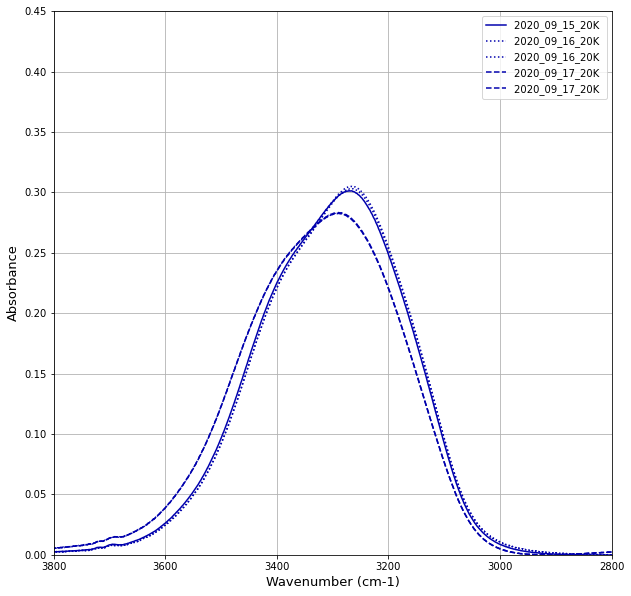

In [52]:
nscan = len(list(data_df['Date'].values.tolist()))

print(nscan)

fig, ax= plt.subplots(figsize=(10,10))

#colors = sns.color_palette("coolwarm", data_df.Temp.nunique())
#ax.set_prop_cycle('color', colors)

#ax.set_prop_cycle(color =['b', 'g'])
#cc = (cycler(linestyle=['-', '--', '-.', ]))

for i in dat['Name']:
    
#DR2
    
    #x = DR2_Allscans_full.Wavenumber
    #y = DR2_Allscans_full['{}'.format(i)]

#`DR3

    x = DR3_Allscans_full.Wavenumber
    y = DR3_Allscans_full['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(data_df.loc[i]['Date']), str(data_df.loc[i]['Temp'])), c=cm.jet(int(data_df.loc[i]['Colour'])/25), linestyle=(data_df.loc[i]['linestyle'])) 


#plt.title('{0} DR1 '.format(date))
plt.axis([3800,2800,0,0.45])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
plt.legend()


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR1\DR1_{0}_All_scans.png'.format(date))

plt.show()

### Max Absorbance

Import code from DR

### Other plotting

In [53]:
# imports
%matplotlib inline

from ipywidgets import interactive
import pandas as pd
import numpy as np
# from jupyterthemes import jtplot

# Sample data
np.random.seed(123)
rows = 50
dfx = pd.DataFrame(np.random.randint(90,110,size=(rows, 1)), columns=['Variable X'])
dfy = pd.DataFrame(np.random.randint(25,68,size=(rows, 1)), columns=['Variable Y'])
dfz = pd.DataFrame(np.random.randint(60,70,size=(rows, 1)), columns=['Variable Z'])

df = pd.concat([dfx,dfy,dfz], axis = 1)
#jtplot.style()

import ipywidgets as widgets
from IPython.display import display

def multiplot(a):
    opts = df.columns.values
    df.loc[:, a].plot()

interactive_plot = interactive(multiplot, a=['Variable X', 'Variable Y', 'Variable Z'])
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(Dropdown(description='a', options=('Variable X', 'Variable Y', 'Variable Z'), value='Var…

## Create class with widget input as variable 

Embed Naming function

[Youtube tutorial on classes](https://www.youtube.com/watch?v=ZDa-Z5JzLYM)

In [54]:
class XP_Param:
    
    def found(self):
        print("input is" + self.column + self.row )
        return XP_Ramp_df_I.loc[self.row,self.column]
    

    

In [55]:
T1 = XP_Param()
T1.column = "60K"
T1.row = "2020_09_21"


In [56]:
T1.found()

input is60K2020_09_21


'[6, 7, 8]'

## Name the desired sample

Purpose here is to create a function that create sample name based on previously selected parameters (date / Temperature)

### Documentation

[Interact function](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#interactive)

In [57]:
output_Date = wD.value

In [58]:
# Define any function
def file_name(output_Date):
    return print(output_Date) 
    


### Plotting strategy

# Plotting

## Data from Data_Annex 

## Data from DR2

## Interactive Plotting

[I python widget list](https://kapernikov.com/ipywidgets-with-matplotlib/)



IntSlider(value=1, continuous_update=False, description='$\\omega$', max=10)

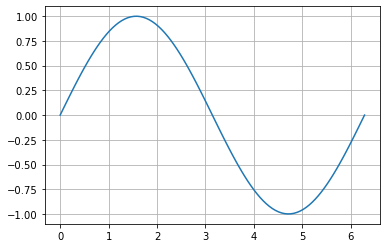

In [59]:
x = numpy.linspace(0, 2 * numpy.pi, 100)
 
fig, ax = plt.subplots()
line, = ax.plot(x, numpy.sin(x))
ax.grid(True)
 
def update(change):
    line.set_ydata(numpy.sin(change.new * x))
    fig.canvas.draw()
     

int_slider = widgets.IntSlider(
    value=1, 
    min=0, max=10, step=1,
    description='$\omega$',
    continuous_update=False
)
int_slider.observe(update, 'value')
int_slider

## wx GUI creation

In [ ]:
import wx

In [60]:
# Création d'un nouveau cadre, dérivé du wxPython 'Frame'.
class TestFrame(wx.Frame):
    def __init__(self, parent, ID, title):
        wx.Frame.__init__(self, parent, -1, title, pos=(0, 0), size=(500, 200))

        # À l'intérieur du cadre, créer un panneau..
        panel = wx.Panel(self, -1)

        # Créer un texte dans le panneau
        texte = wx.StaticText(panel, -1, "Bonjour tout le monde!", wx.Point(10, 5), wx.Size(-1, -1))
                
        # Créer un bouton dans le panneau
        bouton = wx.Button(panel, -1, "Cliquez-moi!",  wx.Point(10, 35), wx.Size(-1, -1))
        # lier le bouton à une fonction:
        self.Bind(wx.EVT_BUTTON, self.creerDiag, bouton)
        
    # fonction qui affiche une boîte de dialogue
    def creerDiag(self, event):
        dlg = wx.MessageDialog(self, "Merci de m'avoir cliqué, ça fait du bien.",
          "Merci!", wx.ICON_EXCLAMATION | wx.YES_NO | wx.CANCEL)
        dlg.ShowModal()
        dlg.Destroy()
        

# Chaque application wxWidgets doit avoir une classe dérivée de wx.App
class TestApp(wx.App):
    def OnInit(self):
        frame = TestFrame(None, -1, "Test")
        self.SetTopWindow(frame)
        frame.Show(True)
        return True

if __name__ == '__main__':
    app = TestApp(0) # créer une nouvelle instance de l'application
    app.MainLoop()   # lancer l'application

In [61]:
app = wx.App()

frame = wx.Frame(None, title='Simple application')
frame.Show()

app.MainLoop()

PyNoAppError: The wx.App object must be created first!

In [62]:
#!/usr/bin/env python

"""
ZetCode wxPython tutorial

In this example, we create a submenu and a menu
separator.

author: Jan Bodnar
website: www.zetcode.com
last modified: July 2020
"""

import wx


class Example(wx.Frame):

    def __init__(self, *args, **kwargs):
        super(Example, self).__init__(*args, **kwargs)

        self.InitUI()

    def InitUI(self):

        menubar = wx.MenuBar()

        fileMenu = wx.Menu()
        fileMenu.Append(wx.ID_NEW, '&New')
        fileMenu.Append(wx.ID_OPEN, '&Open')
        fileMenu.Append(wx.ID_SAVE, '&Save')
        fileMenu.AppendSeparator()

        imp = wx.Menu()
        imp.Append(wx.ID_ANY, 'Import newsfeed list...')
        imp.Append(wx.ID_ANY, 'Import bookmarks...')
        imp.Append(wx.ID_ANY, 'Import mail...')

        fileMenu.AppendMenu(wx.ID_ANY, 'I&mport', imp)

        qmi = wx.MenuItem(fileMenu, wx.ID_EXIT, '&Quit\tCtrl+W')
        fileMenu.AppendItem(qmi)

        self.Bind(wx.EVT_MENU, self.OnQuit, qmi)

        menubar.Append(fileMenu, '&File')
        self.SetMenuBar(menubar)

        self.SetSize((900, 600))
        self.SetTitle('Data Analysis Plotting GUI')
        self.Centre()

    def OnQuit(self, e):
        self.Close()


def main():

    app = wx.App()
    ex = Example(None)
    ex.Show()
    app.MainLoop()


if __name__ == '__main__':
    main()

<ipython-input-62-2cf284cf38ca>:39: wxPyDeprecationWarning: Call to deprecated item. Use Append instead.
  fileMenu.AppendMenu(wx.ID_ANY, 'I&mport', imp)
<ipython-input-62-2cf284cf38ca>:42: wxPyDeprecationWarning: Call to deprecated item. Use Append instead.
  fileMenu.AppendItem(qmi)


In [ ]:
#!/usr/bin/env python


"""
ZetCode wxPython tutorial

In this example we create a Go To class
layout with wx.BoxSizer.

author: Jan Bodnar
website: www.zetcode.com
last modified: July 2020
"""

import wx

class Example(wx.Frame):

    def __init__(self, parent, title):
        super(Example, self).__init__(parent, title=title)

        self.InitUI()
        self.Centre()

    def InitUI(self):

        panel = wx.Panel(self)

        font = wx.SystemSettings.GetFont(wx.SYS_SYSTEM_FONT)

        font.SetPointSize(9)

        vbox = wx.BoxSizer(wx.VERTICAL)

        hbox1 = wx.BoxSizer(wx.HORIZONTAL)
        st1 = wx.StaticText(panel, label='Class Name')
        st1.SetFont(font)
        hbox1.Add(st1, flag=wx.RIGHT, border=8)
        tc = wx.TextCtrl(panel)
        hbox1.Add(tc, proportion=1)
        vbox.Add(hbox1, flag=wx.EXPAND|wx.LEFT|wx.RIGHT|wx.TOP, border=10)

        vbox.Add((-1, 10))

        hbox2 = wx.BoxSizer(wx.HORIZONTAL)
        st2 = wx.StaticText(panel, label='Matching Classes')
        st2.SetFont(font)
        hbox2.Add(st2)
        vbox.Add(hbox2, flag=wx.LEFT | wx.TOP, border=10)

        vbox.Add((-1, 10))

        hbox3 = wx.BoxSizer(wx.HORIZONTAL)
        tc2 = wx.TextCtrl(panel, style=wx.TE_MULTILINE)
        hbox3.Add(tc2, proportion=1, flag=wx.EXPAND)
        vbox.Add(hbox3, proportion=1, flag=wx.LEFT|wx.RIGHT|wx.EXPAND,
            border=10)

        vbox.Add((-1, 25))

        hbox4 = wx.BoxSizer(wx.HORIZONTAL)
        cb1 = wx.CheckBox(panel, label='Case Sensitive')
        cb1.SetFont(font)
        hbox4.Add(cb1)
        cb2 = wx.CheckBox(panel, label='Nested Classes')
        cb2.SetFont(font)
        hbox4.Add(cb2, flag=wx.LEFT, border=10)
        cb3 = wx.CheckBox(panel, label='Non-Project classes')
        cb3.SetFont(font)
        hbox4.Add(cb3, flag=wx.LEFT, border=10)
        vbox.Add(hbox4, flag=wx.LEFT, border=10)

        vbox.Add((-1, 25))

        hbox5 = wx.BoxSizer(wx.HORIZONTAL)
        btn1 = wx.Button(panel, label='Ok', size=(70, 30))
        hbox5.Add(btn1)
        btn2 = wx.Button(panel, label='Close', size=(70, 30))
        hbox5.Add(btn2, flag=wx.LEFT|wx.BOTTOM, border=5)
        vbox.Add(hbox5, flag=wx.ALIGN_RIGHT|wx.RIGHT, border=10)

        panel.SetSizer(vbox)


def main():

    app = wx.App()
    ex = Example(None, title='Go To Class')
    ex.Show()
    app.MainLoop()


if __name__ == '__main__':
    main()

In [63]:
%load_ext watermark


ModuleNotFoundError: No module named 'watermark'

## Package version for binder

In [6]:
%watermark --iversions


matplotlib: 3.2.2
ipywidgets: 7.6.3
re        : 2.2.1
wx        : 4.1.1
pandas    : 1.0.5
numpy     : 1.18.5

